In [1]:
import pandas as pd
def normal(x):
    min_value = x.min()
    max_value = x.max()

    return (x - min_value) / (max_value - min_value)


#mean = df['column_to_normalize'].mean()
#std = df['column_to_normalize'].std()
#df['normalized_column'] = (df['column_to_normalize'] - mean) / std

import_file = 'sub04-static-test_ADOEFFORT_2023-11-29_14h54.06.943.csv'
sub = import_file[3:5]
path = '/Users/ali/Desktop/Experiment/sub'+sub+'/'

if import_file[6:8] == "ro":
    strategy = 'rolling'
elif import_file[6:8] == "pr":
    strategy = 'proactive'
elif import_file[6:8] == "re":
    strategy = 'reactive'
elif import_file[6:8] == "st":
    strategy = 'static'

# Import an Excel file into a DataFrame
columns_to_import = ['n_block','n_back','m_correct','DifficultyLevel',
                     'false_alarm','hit','correct_rejection','miss',
                     'slider_effort.response','slider_arous.response','slider_valenc.response','slider_time.response','score']

df = pd.read_csv(path + import_file, usecols=columns_to_import)

df = df.dropna()

#computing dprim as perfomance
from scipy.stats import norm

df.loc[df['false_alarm'] == 0, 'false_alarm'] = 0.01
df.loc[df['miss'] == 0, 'miss'] = 0.01
df.loc[df['miss'] == 0, 'miss'] = 0.01
df.loc[df['hit'] == 0, 'hit'] = 0.01

df['dprime'] = norm.ppf(df['hit']/(df['hit']+df['miss']))- norm.ppf(df['false_alarm']/(df['false_alarm']+df['correct_rejection']))
df['g'] = df['dprime']/6.8

#normlize the self-reports
df['effort'] = normal(df['slider_effort.response'])
df['arousal'] = normal(df['slider_arous.response'])
df['valence'] = normal(df['slider_valenc.response'])
df['time'] = normal(df['slider_time.response'])


#adding RT
df.reset_index(drop=True, inplace=True)

#creating list of low and high effort txt list
median_effort = df['effort'].median()

# Separating indices based on the median
below_or_equal_median_indices = df[df['effort'] <= median_effort].index.tolist()
above_median_indices = df[df['effort'] > median_effort].index.tolist()

# Writing indices to txt files
with open(path+'sub'+sub+'-'+strategy+'-'+'low-effort.txt', 'w') as file:
    for index in below_or_equal_median_indices:
        file.write(f"{index}\n")

with open(path+'sub'+sub+'-'+strategy+'-'+'high-effort.txt', 'w') as file:
    for index in above_median_indices:
        file.write(f"{index}\n")

#computing response time of hit and false alaram
dfrt = pd.read_csv(path + import_file)
step_size = 62
means_list = []

# Iterate over the DataFrame in segments of 62 rows (excluding every 62nd row)
for start_idx in range(0, len(dfrt), step_size):
    end_idx = start_idx + step_size - 1  # Exclude the 62nd row, which is empty

    # Select the segment, excluding the last row (which is empty)
    df_segment = dfrt.iloc[start_idx:end_idx]

    # Calculate means where feedback is 12 and 13
    mean_response_12 = df_segment[df_segment['feedback'] == 12]['responseTime'].mean()
    mean_response_13 = df_segment[df_segment['feedback'] == 13]['responseTime'].mean()

    # Append the means to the list
    means_list.append({'mean_response_12': mean_response_12, 'mean_response_13': mean_response_13})

# Create a new DataFrame with the means
means_df = pd.DataFrame(means_list)

# Now means_df is the new DataFrame containing the means for each segment we put it back to df
df['rt_f'] = means_df['mean_response_12']
df['rt_h'] = means_df['mean_response_13']

#export
export_file = 'sub'+sub+'-'+strategy+'-'+'test'+'.csv'
df.to_csv(path + export_file, index=False)

df

,score,n_back,m_correct,DifficultyLevel,false_alarm,hit,correct_rejection,miss,n_block,slider_effort.response,...,slider_valenc.response,slider_time.response,dprime,g,effort,arousal,valence,time,rt_f,rt_h
0,20,1.0,4.0,4.0,0.01,20.0,39.0,1.00,0.0,22.407407,...,73.425926,47.037037,5.142429,0.756240,0.328671,0.245530,1.000000,0.562057,NaN,0.531074
1,10,2.0,4.0,7.0,0.01,10.0,40.0,10.00,1.0,50.462963,...,41.851852,22.777778,3.480823,0.511886,0.752448,0.644815,0.340426,0.097518,NaN,0.612567
2,6,3.0,4.0,10.0,0.01,6.0,39.0,15.00,2.0,64.351852,...,44.074074,17.685185,2.908089,0.427660,0.962238,1.000000,0.386847,0.000000,NaN,0.740525
3,9,2.0,8.0,11.0,0.01,9.0,40.0,11.00,3.0,21.944444,...,25.555556,35.555556,3.355162,0.493406,0.321678,0.682956,0.000000,0.342199,NaN,0.701782
4,18,1.0,8.0,8.0,0.01,18.0,40.0,2.00,4.0,12.500000,...,30.740741,46.481481,4.762375,0.700349,0.179021,0.457688,0.108317,0.551418,NaN,0.448300
5,9,3.0,8.0,14.0,0.01,9.0,40.0,11.00,5.0,49.259259,...,33.888889,47.500000,3.355162,0.493406,0.734266,0.812872,0.174081,0.570922,NaN,0.643293
6,13,2.0,12.0,15.0,0.01,13.0,39.0,8.00,6.0,46.944444,...,46.944444,44.351852,3.777018,0.555444,0.699301,0.502980,0.446809,0.510638,NaN,0.564728
7,10,3.0,12.0,18.0,0.01,10.0,40.0,10.00,7.0,65.925926,...,45.925926,49.351852,3.480823,0.511886,0.986014,0.851013,0.425532,0.606383,NaN,0.581923
8,14,3.0,12.0,18.0,0.01,14.0,40.0,6.00,8.0,65.833333,...,35.925926,25.833333,4.005224,0.589004,0.984615,0.917759,0.216634,0.156028,NaN,0.627422
9,20,1.0,12.0,12.0,0.01,20.0,40.0,0.01,9.0,0.925926,...,57.037037,41.944444,6.771491,0.995807,0.004196,0.115614,0.657640,0.464539,0.296957,0.399866


/var/folders/2c/svzl68596196fc899jtjl4t00000gn/T/ipykernel_3906/1414655170.py:41: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


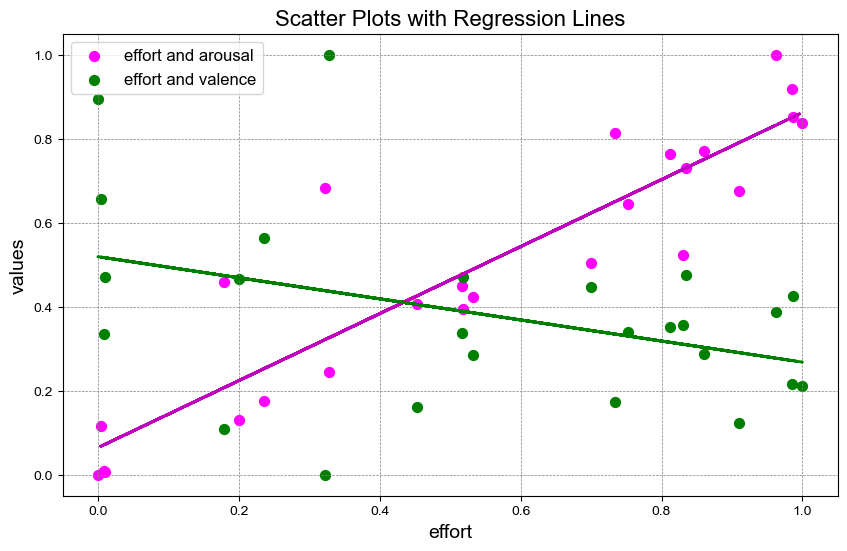

Regression Summary for effort and arousal : 
  Slope: 0.80
  Intercept: 0.06
  Correlation Coefficient (r): 0.91
  P-value: 0.00
  Standard error of the estimate: 0.07

Regression Summary for effort and valence : 
  Slope: -0.25
  Intercept: 0.52
  Correlation Coefficient (r): -0.39
  P-value: 0.06
  Standard error of the estimate: 0.13


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


#which variables ?
x = df['effort']
x.name = df['effort'].head().name

y = df['arousal']
y.name = df['arousal'].head().name

z = df['valence']
z.name = df['valence'].head().name


# Scatter Plot with regression lines
plt.figure(figsize=(10, 6))

# Regression line for Column1 and Column2
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)
plt.scatter(x, y, label= x.name+" and "+y.name, color='magenta', s=50)
plt.plot(x, p1(x), "m--", linewidth=2)

# Regression line for Column1 and Column3
z2 = np.polyfit(x, z, 1)
p2 = np.poly1d(z2)
plt.scatter(x, z, label= x.name+" and "+z.name, color='green', s=50)
plt.plot(x, p2(x), "g--", linewidth=2)

# Labels, Title, and Legend
plt.xlabel(x.name, fontsize=14)
plt.ylabel('values', fontsize=14)
plt.title('Scatter Plots with Regression Lines', fontsize=16)
plt.legend(fontsize=12)

# Grid and Style
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.style.use('seaborn-darkgrid')

# Show the plot
plt.show()

# Calculate and print the statistics for Column1 and Column2
result1 = linregress(x, y)
print("Regression Summary for " +x.name+" and "+y.name+" : ")
print(f"  Slope: {result1.slope:.2f}")
print(f"  Intercept: {result1.intercept:.2f}")
print(f"  Correlation Coefficient (r): {result1.rvalue:.2f}")
print(f"  P-value: {result1.pvalue:.2f}")
print(f"  Standard error of the estimate: {result1.stderr:.2f}")

# Calculate and print the statistics for Column1 and Column3
result2 = linregress(x, z)
print("\nRegression Summary for " +x.name+" and "+z.name+" : ")
print(f"  Slope: {result2.slope:.2f}")
print(f"  Intercept: {result2.intercept:.2f}")
print(f"  Correlation Coefficient (r): {result2.rvalue:.2f}")
print(f"  P-value: {result2.pvalue:.2f}")
print(f"  Standard error of the estimate: {result2.stderr:.2f}")
